In [1]:
################# User Inputs
# Paths
imDir = 'X:\\Force Project\\PublicationData\\SpinningDisk_Myosin\\3D_timelapse'
dataName = '20241107_U2OS_SGRLC_100Xoil_15mintimelapse_01_25plaser'
dataDir = imDir + '\\OpticalFlow3D_Python\\20241107_U2OS_SGRLC_100Xoil_15mintimelapse_01_25plaser'
saveDir = 'X:\\Force Project\\PublicationData\\SpinningDisk_Myosin\\PublicationFigures\\FigureS3'
# Metadata
xyscale = 0.065 # um/pixel
zscale = 0.2 # um/pixel
tscale = 45/60 # minutes/frame


################# Set up
# Notebook
import tifffile as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import colorcet as cc

# Convert paths
imDir = Path(imDir)
dataDir = Path(dataDir)
saveDir = Path(saveDir)

# Visualization parameters
zSlice = 6
ySlice = 1175-1 #  FIJI starts indexing from 1, so this matches the 2D_yslice1175 folder
frame = 3

In [ ]:
# Load the reliablity file
relFile = dataName + '_rel_t' + str(frame).zfill(4) + '.tiff'
rel = tf.imread(dataDir / relFile)

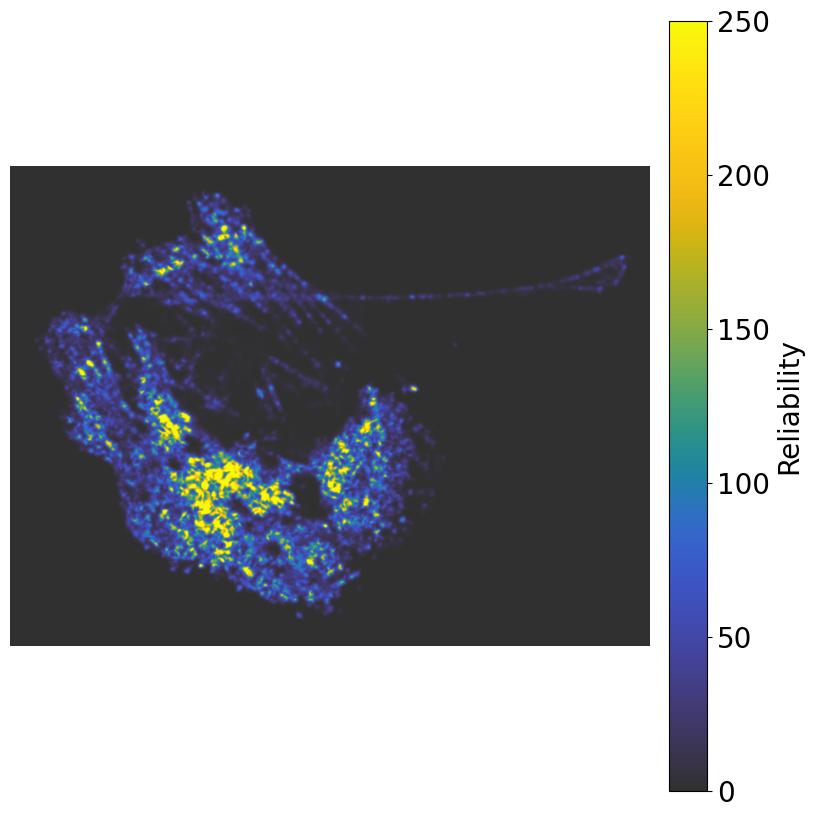

In [32]:
# Reliability z-slice
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

cmin=0
cmax=250
im = ax.imshow(rel[zSlice,420:1750,300:2075],vmin=cmin,vmax=cmax,cmap=cc.m_CET_L20)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_aspect('equal')
ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])

fig.set_facecolor("black")
plt.axis('off')

# Save without colorbar
saveName = 'FigureS3B_Reliability_Frame' + str(frame) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

cbar = plt.colorbar(im,ax=ax,pad=0.025)
cbar.set_label("Reliability")

fig.set_facecolor("white")

# Save with colorbar
saveName = 'FigureS3B_Reliability_Frame' + str(frame) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')
saveName = 'FigureS3B_Reliability_Frame' + str(frame) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '_colorbar.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

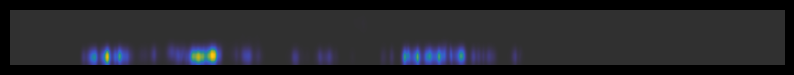

In [35]:
# Reliability y-slice
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

cmin=0
cmax=250
im = ax.imshow(rel[:,ySlice,300:2075],vmin=cmin,vmax=cmax,cmap=cc.m_CET_L20)

plt.rcParams.update({'font.size': 20}) # Set global font size

ax.set_facecolor("black")
ax.set_xticks([])
ax.set_yticks([])
ax.yaxis.set_inverted(False)
ax.set_aspect(zscale/xyscale)

fig.set_facecolor("black")
plt.axis('off')

# Save without colorbar
saveName = 'FigureS3B_Reliability_Frame' + str(frame) +  '_ySlice' + str(ySlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

In [23]:
# Illustrate Different Thresholds

relThresh85 = np.percentile(rel,85)
print('Reliability threshold 85 = ' + str(relThresh85))
relMask85 = rel > relThresh85

relThresh90 = np.percentile(rel,90)
print('Reliability threshold 90 = ' + str(relThresh90))
relMask90 = rel > relThresh90

relThresh95 = np.percentile(rel,95)
print('Reliability threshold 95 = ' + str(relThresh95))
relMask95 = rel > relThresh95

Reliability threshold 85 = 0.05904527
Reliability threshold 90 = 0.105559126
Reliability threshold 95 = 2.0252573


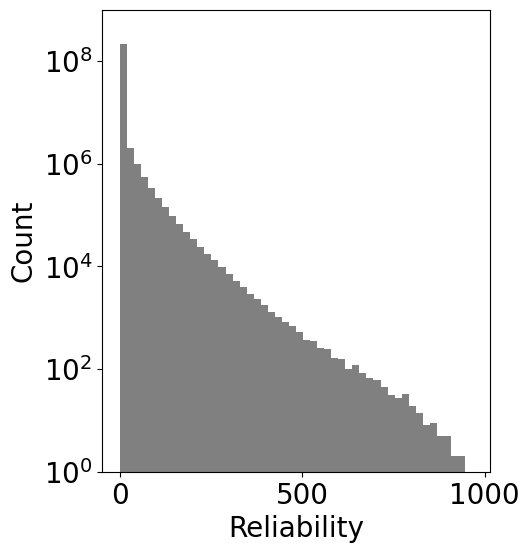

In [36]:
# Reliability Histogram
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(6)

plt.hist(rel.flatten(),50,color='gray')
plt.xlabel("Reliability")
plt.ylabel("Count")
plt.yscale('log')
plt.ylim([10**0,10**9])

# Save
saveName = 'FigureS3C_Reliability_Distribution.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')
saveName = 'FigureS3C_Reliability_Distribution.svg'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

# Show
plt.show()

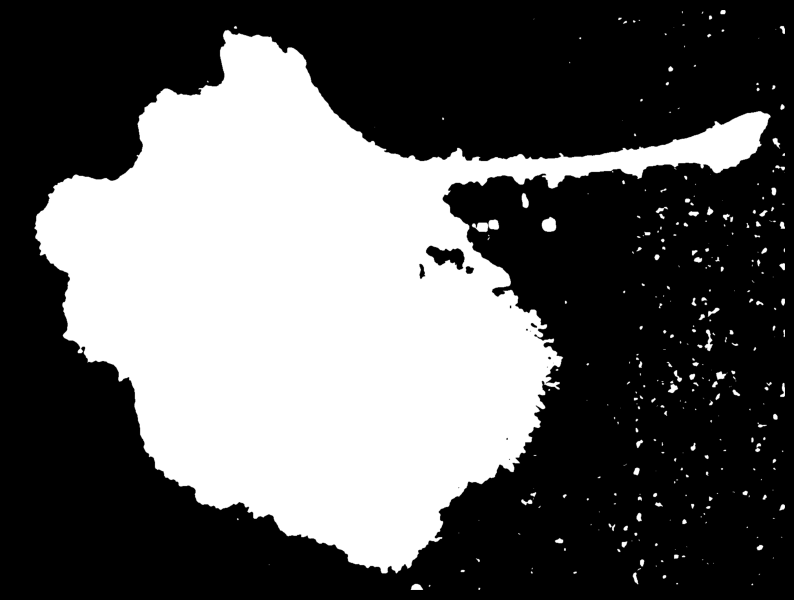

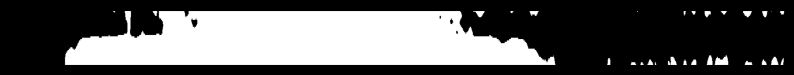

In [37]:
# Plot masks - 85
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(relMask85[zSlice,420:1750,300:2075],aspect='equal',cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

fig.set_facecolor("black")

# Save 
saveName = 'FigureS3D_ReliabilityMask85_Frame' + str(frame) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(relMask85[:,ySlice,300:2075],cmap='gray',aspect=zscale/xyscale)
ax.set_xticks([])
ax.set_yticks([])
ax.yaxis.set_inverted(False)
fig.set_facecolor("black")

# Save
saveName = 'FigureS3D_ReliabilityMask85_Frame' + str(frame) +  '_ySlice' + str(ySlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

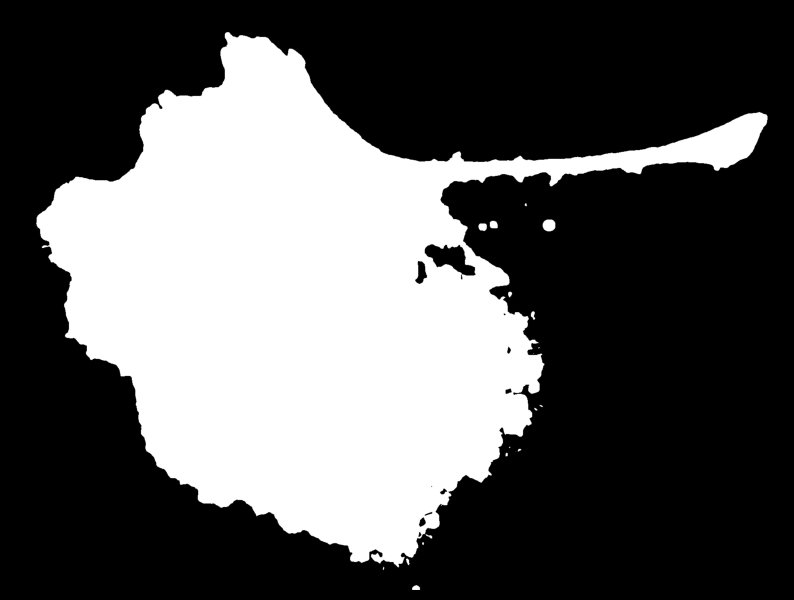

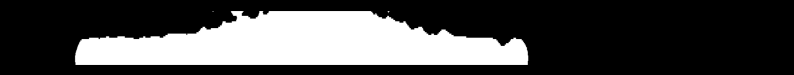

In [38]:
# Plot masks - 90
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(relMask90[zSlice,420:1750,300:2075],aspect='equal',cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

fig.set_facecolor("black")

# Save 
saveName = 'FigureS3E_ReliabilityMask90_Frame' + str(frame) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(relMask90[:,ySlice,300:2075],cmap='gray',aspect=zscale/xyscale)
ax.set_xticks([])
ax.set_yticks([])
ax.yaxis.set_inverted(False)

fig.set_facecolor("black")

# Save
saveName = 'FigureS3E_ReliabilityMask90_Frame' + str(frame) +  '_ySlice' + str(ySlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

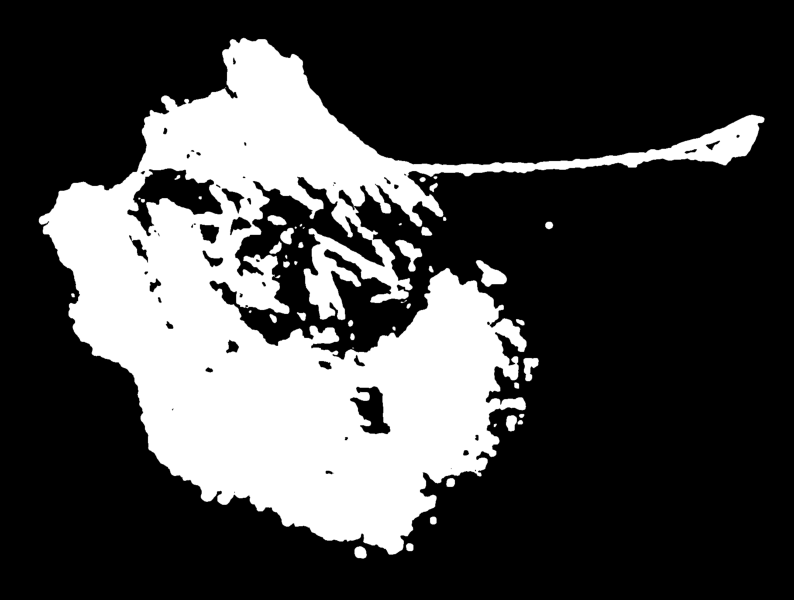

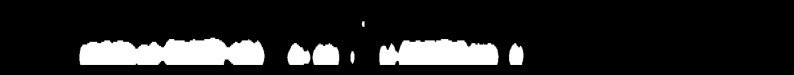

In [39]:
# Plot masks - 95
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(relMask95[zSlice,420:1750,300:2075],aspect='equal',cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

fig.set_facecolor("black")

# Save 
saveName = 'FigureS3F_ReliabilityMask95_Frame' + str(frame) +  '_zSlice' + str(zSlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(relMask95[:,ySlice,300:2075],cmap='gray',aspect=zscale/xyscale)
ax.set_xticks([])
ax.set_yticks([])
ax.yaxis.set_inverted(False)

fig.set_facecolor("black")

# Save 
saveName = 'FigureS3F_ReliabilityMask95_Frame' + str(frame) +  '_ySlice' + str(ySlice) + '_cmin' + str(cmin) + '_cmax' + str(cmax) + '.png'
plt.savefig(saveDir / saveName, dpi=300, bbox_inches='tight')

plt.show()